# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
!pip -q install ./python

from unityagents import UnityEnvironment
import numpy as np

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.9 which is incompatible.


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")
# env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# # reset the environment
# env_info = env.reset(train_mode=True)[brain_name]

# # number of agents 
# num_agents = len(env_info.agents)
# print('Number of agents:', num_agents)

# # size of each action
# action_size = brain.vector_action_space_size
# print('Size of each action:', action_size)

# # examine the state space 
# states = env_info.vector_observations
# state_size = states.shape[1]
# print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
# print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import random
import torch
from collections import namedtuple, deque
import matplotlib.pyplot as plt
%matplotlib inline

plt.ion()

In [8]:
from maddpgLocal import MADDPG
from maddpgLocal import ReplayBuffer

In [9]:
BUFFER_SIZE = int(1e6)         # replay buffer size
BATCH_SIZE = 128               # minibatch size
SEED = 0

In [10]:
maddpg = MADDPG(seed=SEED)
memory = ReplayBuffer(BUFFER_SIZE, BATCH_SIZE, SEED)

In [11]:
num_agents = 2

n_episodes = 10000
max_t = 1000
print_every = 100
updateaftertimesteps = 4
multiplelearnperupdate = 3
noise = 1
noise_reduction = 1
    
scores_all = []
scores_window = deque(maxlen=100)
scores1 = deque(maxlen=100)
scores2 = deque(maxlen=100)

In [12]:
for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    
    maddpg.agents[0].reset()
    maddpg.agents[1].reset()
        
    for t in range(max_t):
            
        # Each agent acts based on its own observed states
        action1 = maddpg.agents[0].act(states[:1],noise)                # select an action for agent 1
        action2 = maddpg.agents[1].act(states[1:],noise)                # select an action for agent 2
        actions = np.concatenate((action1, action2),axis=0)
        
        noise *= noise_reduction
        
        # Find the outcome of every agent's action on the environment
        env_info = env.step(actions)[brain_name]       # send all actions to the environment
        next_states = env_info.vector_observations     # get next state (for each agent)
        rewards = env_info.rewards                     # get reward (for each agent)
        dones = env_info.local_done                    # get whether done (for each agent)    
        
        memory.add(states, actions, rewards, next_states, dones)
        if len(memory) > BATCH_SIZE:
            if t%updateaftertimesteps == 0:
                for _ in range(multiplelearnperupdate):
                    for a_i in range(2):
                        samples = memory.sample()
                        maddpg.update(samples, a_i)
                        maddpg.update_targets(a_i)
    
        scores += env_info.rewards
        states = next_states
        if np.any(dones):
            break
            
    scores_window.append(np.max(scores))
    scores1.append(scores[0])
    scores2.append(scores[1])
    scores_all.append(np.max(scores))
    print('\rEpisode {}\tAverage Score: {:.3f}\tScore1: {:.3f}\tScore2: {:.3f}'.\
          format(i_episode, np.mean(scores_window)\
                 ,np.mean(scores1),np.mean(scores2)),end="")

    if i_episode % print_every == 0:
        print('\rEpisode {}\tAverage Score: {:.3f}\tScore1: {:.3f}\tScore2: {:.3f}'.\
              format(i_episode, np.mean(scores_window),np.mean(scores1),np.mean(scores2)))
    if np.mean(scores_window)>=0.5:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.\
              format(i_episode, np.mean(scores_window)))

        torch.save(maddpg.agents[0].actor_local.state_dict(), 'agent0_localactor.pth')
        torch.save(maddpg.agents[0].actor_target.state_dict(), 'agent0_targetactor.pth')
        torch.save(maddpg.agents[0].critic_local.state_dict(), 'agent0_localcritic.pth')
        torch.save(maddpg.agents[0].critic_target.state_dict(), 'agent0_targetcritic.pth')
        
        torch.save(maddpg.agents[1].actor_local.state_dict(), 'agent1_localactor.pth')
        torch.save(maddpg.agents[1].actor_target.state_dict(), 'agent1_targetactor.pth')
        torch.save(maddpg.agents[1].critic_local.state_dict(), 'agent1_localcritic.pth')
        torch.save(maddpg.agents[1].critic_target.state_dict(), 'agent1_targetcritic.pth')

        break

Episode 100	Average Score: 0.014	Score1: -0.005	Score2: 0.009
Episode 200	Average Score: 0.000	Score1: -0.004	Score2: -0.006
Episode 300	Average Score: 0.000	Score1: -0.005	Score2: -0.005
Episode 400	Average Score: 0.000	Score1: -0.004	Score2: -0.005
Episode 500	Average Score: 0.000	Score1: -0.004	Score2: -0.006
Episode 600	Average Score: 0.000	Score1: -0.005	Score2: -0.005
Episode 700	Average Score: 0.006	Score1: -0.003	Score2: 0.0010
Episode 800	Average Score: 0.000	Score1: -0.005	Score2: -0.005
Episode 900	Average Score: 0.000	Score1: -0.005	Score2: -0.005
Episode 1000	Average Score: 0.009	Score1: 0.005	Score2: -0.005
Episode 1100	Average Score: 0.017	Score1: 0.004	Score2: 0.0041
Episode 1200	Average Score: 0.014	Score1: -0.003	Score2: 0.007
Episode 1300	Average Score: 0.019	Score1: 0.002	Score2: 0.00741
Episode 1400	Average Score: 0.037	Score1: 0.016	Score2: 0.014
Episode 1500	Average Score: 0.032	Score1: -0.002	Score2: 0.025
Episode 1600	Average Score: 0.067	Score1: 0.017	Score2: 

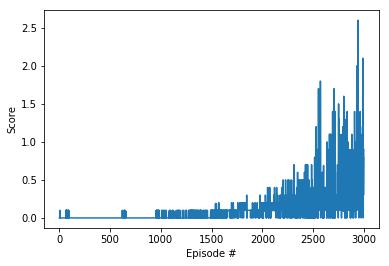

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_all)+1), scores_all)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

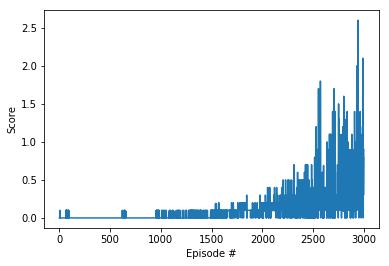

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_all)+1), scores_all)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('result.png')